In [922]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import ast
from textblob import TextBlob
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor


df_ted_main = pd.read_csv("data/ted_main.csv")
df_ted_transcripts = df = pd.read_csv("data/transcripts.csv")

df_ted_main.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [923]:
df_ted_main.drop(['description', 'film_date', 'main_speaker', 'name', 'event', 'num_speaker', 'related_talks', 'speaker_occupation', 'title', 'url'], axis=1, inplace=True)
df_ted_main.head()

,comments,duration,languages,published_date,ratings,tags,views
0,4553,1164,60,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","['children', 'creativity', 'culture', 'dance',...",47227110
1,265,977,43,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","['alternative energy', 'cars', 'climate change...",3200520
2,124,1286,26,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","['computers', 'entertainment', 'interface desi...",1636292
3,200,1116,35,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","['MacArthur grant', 'activism', 'business', 'c...",1697550
4,593,1190,48,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","['Africa', 'Asia', 'Google', 'demo', 'economic...",12005869


In [924]:
# ----------------------------------------------------------
# 2. one hot encoding
# ----------------------------------------------------------

# one hot encoding tags

# iterate trough the data set
for i, row in df_ted_main.iterrows():
    # change string formed list into normal list
    element_list_form = ast.literal_eval(df_ted_main.at[i,'tags'])
    element_list_form = [i.strip() for i in element_list_form]
    # finish converting by replacing string version of a list for the list type
    df_ted_main.at[i,'tags'] = element_list_form

# one hot encoding with column named "tags"
# since "tags" is a Series on each row, we need to split them first and then we can do one hot encoding
df_ted_main = df_ted_main.drop('tags', 1).join(
    pd.get_dummies(
        pd.DataFrame(df_ted_main.tags.tolist()).stack()
    ).astype(int).sum(level=0)
)

df_ted_main.head()

,comments,duration,languages,published_date,ratings,views,3d printing,AI,AIDS,Addiction,...,wikipedia,wind energy,women,women in business,work,work-life balance,world cultures,writing,wunderkind,youth
0,4553,1164,60,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",47227110,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,265,977,43,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",3200520,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,124,1286,26,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",1636292,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,200,1116,35,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...",1697550,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,593,1190,48,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...",12005869,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [925]:
# # one hot encoding "event" column

# def one_hot_encode(original_dataframe, feature_to_encode):
#     dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
#     res = pd.concat([original_dataframe, dummies], axis=1)
#     res = res.drop([feature_to_encode], axis=1)
#     return(res)

# df_ted_main = one_hot_encode(df_ted_main, 'event')
# df_ted_main.head()

In [926]:
#rating analysis

df_ted_main['ratings']=df_ted_main['ratings'].str.replace("'",'"')

df_ted_main=df_ted_main.merge(df_ted_main.ratings.apply(lambda x: pd.Series(pd.read_json(x)['count'].values,index=pd.read_json(x)['name'])), 
            left_index=True, right_index=True)

df_ted_main.drop('ratings', axis=1, inplace=True)

df_ted_main.head()

,comments,duration,languages,published_date,views,3d printing,AI,AIDS,Addiction,Africa,...,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring
0,4553,1164,60,1151367060,47227110,0,0,0,0,0,...,387,242,7346,10581,300,10704,4439,1174,209,24924
1,265,977,43,1151367060,3200520,0,0,0,0,0,...,113,62,443,132,258,268,116,203,131,413
2,124,1286,26,1151367060,1636292,0,0,0,0,0,...,78,27,395,166,104,230,54,146,142,230
3,200,1116,35,1151367060,1697550,0,0,0,0,0,...,53,32,380,132,36,460,230,85,35,1070
4,593,1190,48,1151440680,12005869,0,0,0,0,1,...,110,72,5433,4606,67,2542,3736,248,61,2893


In [927]:
# sentiment analysis of transcript
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df_ted_transcripts['polarity'] = df_ted_transcripts['transcript'].apply(pol)
df_ted_transcripts['subjectivity'] = df_ted_transcripts['transcript'].apply(sub)
df_ted_transcripts.head()

,transcript,url,polarity,subjectivity
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...,0.146452,0.462051
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...,0.157775,0.424101
2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...,0.136579,0.475229
3,If you're here today — and I'm very happy that...,https://www.ted.com/talks/majora_carter_s_tale...,0.082928,0.439165
4,"About 10 years ago, I took on the task to teac...",https://www.ted.com/talks/hans_rosling_shows_t...,0.096483,0.450631


In [928]:
# merging both datasets and delete the rows that don't have a transcipt
df_ted_talks = pd.merge(df_ted_main, df_ted_transcripts, left_index=True, right_index=True)

In [929]:
# deleting the transcript and url columns because we don't need them.
del df_ted_talks['transcript']
del df_ted_talks['url']
df_ted_talks.head()

,comments,duration,languages,published_date,views,3d printing,AI,AIDS,Addiction,Africa,...,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring,polarity,subjectivity
0,4553,1164,60,1151367060,47227110,0,0,0,0,0,...,7346,10581,300,10704,4439,1174,209,24924,0.146452,0.462051
1,265,977,43,1151367060,3200520,0,0,0,0,0,...,443,132,258,268,116,203,131,413,0.157775,0.424101
2,124,1286,26,1151367060,1636292,0,0,0,0,0,...,395,166,104,230,54,146,142,230,0.136579,0.475229
3,200,1116,35,1151367060,1697550,0,0,0,0,0,...,380,132,36,460,230,85,35,1070,0.082928,0.439165
4,593,1190,48,1151440680,12005869,0,0,0,0,1,...,5433,4606,67,2542,3736,248,61,2893,0.096483,0.450631


In [930]:
# from sklearn.preprocessing import StandardScaler

# scaled_features = StandardScaler().fit_transform(result.values)

# result = pd.DataFrame(scaled_features, index=result.index, columns=result.columns)
# result

In [931]:
# # shuffle data set before splitting
# result = result.sample(frac=1).reset_index(drop=True)
# result

In [932]:
# from sklearn.model_selection import StratifiedShuffleSplit

# split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# for train_index, test_index in split.split(df_ted_talks, df_ted_talks["views"]):
#     df_train_set = df_ted_talks.loc[train_index]
#     df_test_set = df_ted_talks.loc[test_index]

# df_test_set["views"].value_counts() / len(df_test_set)

In [933]:
#We will shuffle the whole dataset first (df.sample(frac=1)) and then split our data set into the following parts:
# 60% - train set
# 20% - validation set
# 20% - test set

# df_train, df_val, df_test = np.split(df_ted_talks.sample(frac=1), [int(.6*len(df_ted_talks)), int(.8*len(df_ted_talks))])

In [934]:
# from sklearn.preprocessing import StandardScaler


# df_train_stand = StandardScaler().fit_transform(df_train.values)
# df_val_stand = StandardScaler().fit_transform(df_val.values)
# df_test_stand = StandardScaler().fit_transform(df_test.values)



# df_train = pd.DataFrame(df_train_stand, index=df_train.index, columns=df_train.columns)
# df_val = pd.DataFrame(df_val_stand, index=df_val.index, columns=df_val.columns)
# df_test = pd.DataFrame(df_test_stand, index=df_test.index, columns=df_test.columns)

In [935]:
# a feature we want to predict - views
labels = np.array(df_ted_talks['views'])

# removing feature we want to predict from the original data set
df_ted_talks = df_ted_talks.drop('views', axis = 1)

In [936]:
# Splitting
train_set, test_set, train_labels, test_labels = train_test_split(df_ted_talks, labels, test_size = 0.14, random_state = 42)


In [937]:
# Standardization

from sklearn.preprocessing import StandardScaler

# Fit on training set only.
# https://stats.stackexchange.com/questions/174823/how-to-apply-standardization-normalization-to-train-and-testset-if-prediction-i
scaler.fit(train_set)

# Apply transform to both the training set and the test set.
df_train_set_scaled = scaler.transform(train_set)
df_test_set_scaled = scaler.transform(test_set)

# convert to data frames
df_train_set = pd.DataFrame(df_train_set_scaled, index=train_set.index, columns=train_set.columns)
df_test_set = pd.DataFrame(df_test_set_scaled, index=test_set.index, columns=test_set.columns)



In [938]:
# PCA preprocessing - getting tag columns

# columns without PCA
columns_without_pca = ['views','subjectivity','polarity','Inspiring','Obnoxious','OK',
                                  'Jaw-dropping','Persuasive','Unconvincing','Fascinating','Informative','Confusing',
                                  'Longwinded','Courageous','Ingenious','Beautiful','Funny','comments','duration',
                                  'languages','published_date']

# get tag columns for both, training and test sets
tag_columns_train_set = df_train_set[df_train_set.columns.difference(columns_without_pca)]
tag_columns_test_set = df_test_set[df_test_set.columns.difference(columns_without_pca)]

# saving indexes of training and test sets for the next step.
# PCA will convert dataframe into numpy array and indexes will be lost. 
# this way I will keep them stored
tag_columns_train_set_indexes = tag_columns_train_set.index
tag_columns_test_set_indexes = tag_columns_test_set.index


##### DELETION #####
# all tag columns as a lists
tag_columns_train_set_list = list(tag_columns_train_set)
tag_columns_test_set_list = list(tag_columns_test_set)

# remove tag columns from original sets
df_train_set.drop(tag_columns_train_set_list, axis=1, inplace=True)
df_test_set.drop(tag_columns_test_set_list, axis=1, inplace=True)


# display all column names in the dataframe without tags
# list(df_train_set)

In [939]:
# PCA
pca = PCA(.80)

# fit PCA only on training set of tag columns
pca.fit(tag_columns_train_set)

# use PCA to transform both sets of tag columns
tag_columns_train_set = pca.transform(tag_columns_train_set)
tag_columns_test_set = pca.transform(tag_columns_test_set)


In [940]:
# combine: 
# PCA transformed training and test sets of tag columns, 
# with original training and test sets

# training set
feat_cols_train = ['feature'+str(i) for i in range(tag_columns_train_set.shape[1])]
# creating a dataframe from PCA results
# df_pca_train = pd.DataFrame(tag_columns_train_set, index=tag_columns_train_set_indexes)
df_pca_train = pd.DataFrame(tag_columns_train_set, columns=feat_cols_train, index=tag_columns_train_set_indexes)


# test set
feat_cols_test = ['feature'+str(i) for i in range(tag_columns_test_set.shape[1])]
# creating a dataframe from PCA results
# df_pca_test = pd.DataFrame(tag_columns_test_set,columns=tag_columns_test_set_indexes)
df_pca_test = pd.DataFrame(tag_columns_test_set, columns=feat_cols_test, index=tag_columns_test_set_indexes)

# results of combining
df_train_set = df_train_set.join(df_pca_train, how="left")
df_test_set = df_test_set.join(df_pca_test, how="left")


In [941]:
df_train_set.info()
df_test_set.info()

# print('Training result Shape:', df_train_set.shape)
# print('Testing result Shape:', df_test_set.shape)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2121 entries, 48 to 860
Columns: 246 entries, comments to feature225
dtypes: float64(246)
memory usage: 4.1 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 346 entries, 1711 to 432
Columns: 246 entries, comments to feature225
dtypes: float64(246)
memory usage: 677.7 KB


In [942]:
df_train_set

,comments,duration,languages,published_date,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,...,feature216,feature217,feature218,feature219,feature220,feature221,feature222,feature223,feature224,feature225
48,-0.375239,-1.531568,0.670963,-1.867001,1.243774,0.452846,0.730267,-0.276685,0.168514,0.726681,...,1.194613,-0.533931,-0.409992,-0.518119,0.675437,1.003069,-0.082645,0.873226,-1.603929,-0.877023
679,-0.280271,1.425466,-0.208791,-0.708059,-0.254112,-0.319885,-0.126975,-0.276685,0.051542,-0.424790,...,-1.029356,-0.072929,-0.602938,0.193162,0.709888,0.106545,-0.648480,0.347846,0.078507,0.226713
1624,-0.257479,-0.144803,0.451024,0.496605,-0.257279,-0.402451,-0.429335,-0.307296,-0.650286,-0.549273,...,0.060098,0.343435,0.731605,-0.357271,0.150030,0.782105,-0.808015,-0.194959,0.566875,0.053109
1486,-0.257479,-1.023001,-3.067993,0.305806,-0.062522,-0.355876,-0.293107,-0.357585,-0.392949,0.135385,...,-0.366098,0.857397,2.430861,2.102511,0.829500,-0.735905,1.409509,0.497287,0.190304,0.498421
1607,0.050216,-0.362387,0.011147,0.475066,-0.254112,-0.385515,-0.475852,-0.344466,-0.580103,-0.455911,...,0.116628,0.209272,-0.400821,-0.009747,-0.601767,0.304213,0.125936,0.122694,0.232107,-0.035640
124,0.312326,-0.732016,0.670963,-1.665388,3.636274,-0.053134,2.438106,-0.278871,1.034102,1.878153,...,-0.708107,-0.229025,0.015499,0.868667,-1.294866,0.098091,0.303549,0.649791,-0.001440,0.624695
1987,-0.105531,-1.130481,1.550717,1.023970,-0.243028,-0.144169,-0.183460,-0.281058,-0.603498,-0.331427,...,-0.315086,-0.293173,-0.227296,0.514504,0.004898,-0.274492,-0.011681,0.135245,0.012513,0.364297
2240,-0.489200,-0.540647,-0.098822,1.398009,-0.249362,-0.300832,-0.193428,0.022865,-0.416343,0.073144,...,-1.145772,1.670582,0.196507,0.078809,0.431264,-0.332963,-0.870511,-1.097980,0.219670,-0.786264
2115,-0.553777,0.264148,0.341055,1.233484,-0.205027,-0.021378,-0.136943,-0.193598,-0.205795,-0.331427,...,-1.729398,0.684695,1.190295,-1.153125,2.696108,-0.592756,2.017292,-0.690732,1.697332,1.032242
1241,-0.325855,0.253662,-0.538699,-0.007451,-0.255695,-0.398217,-0.509079,-0.215463,0.004754,-0.518153,...,0.140882,0.297259,0.701619,0.424799,-0.353415,-1.721251,-0.068357,0.782213,-0.158165,0.455434


In [943]:
df_test_set

,comments,duration,languages,published_date,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,...,feature216,feature217,feature218,feature219,feature220,feature221,feature222,feature223,feature224,feature225
1711,-0.090336,-0.608806,0.451024,0.624667,-0.222444,1.071031,-0.465884,1.743636,-0.416343,0.042023,...,0.633547,2.571862,-0.019691,1.413999,-0.804681,2.058144,-0.441086,1.422541,1.026234,-1.457140
1557,-0.120726,-0.490839,0.341055,0.396513,-0.252528,-0.286012,-0.093748,0.011932,-0.790652,-0.580394,...,0.249341,0.821272,0.651633,0.324193,1.038629,-0.675183,-0.559964,-0.609927,-0.424244,0.545533
1870,-0.344849,0.429302,0.011147,0.847260,-0.241445,-0.099710,-0.455916,-0.023051,-0.580103,-0.362548,...,-0.386335,-0.570781,0.102614,-0.541950,0.555364,0.085721,-1.568281,3.047928,0.173815,-0.628113
1703,0.080606,0.366386,0.231086,0.614397,-0.239861,-0.368578,-0.465884,0.079714,-0.416343,-0.331427,...,-0.537333,0.356057,-0.277620,0.871180,0.731046,0.860685,0.413392,1.078597,-1.405438,0.085859
1857,-0.455011,-0.642885,0.560994,0.829513,-0.181276,-0.036198,-0.346269,-0.121444,-0.065429,0.197627,...,-0.658828,0.492414,-0.212262,0.239458,0.186853,-0.241365,0.036808,-0.058318,-0.265986,0.344530
756,1.421547,0.678343,-0.318761,-0.598678,-0.231944,-0.357993,-0.372850,-0.246074,0.191908,0.042023,...,-0.439436,-0.438808,-0.388433,0.410473,0.707890,0.229231,-0.731734,1.126554,0.029636,1.065275
727,0.661807,0.953599,0.011147,-0.645403,-0.254112,-0.317768,-0.482498,0.359585,0.566217,-0.362548,...,0.318513,1.862115,-0.080695,1.850393,1.327071,1.069852,0.815991,0.183956,0.298180,-0.974615
1050,-0.333453,-0.663857,0.341055,-0.198197,-0.243028,-0.368578,-0.057199,-0.309482,-0.673680,-0.580394,...,-0.721241,-1.139296,-0.191653,-1.021551,-0.157669,1.368369,-0.601911,-0.611311,-0.173332,1.885331
498,-0.200498,0.604941,0.011147,-0.963665,-0.254112,0.048485,0.407971,-0.305109,0.332274,0.010902,...,-1.259164,0.982336,-0.776854,0.435283,0.304742,1.029045,-0.402544,2.069961,-0.068367,0.025499
237,-0.572771,-1.167182,-3.067993,-1.362952,-0.257279,0.287714,-0.502433,-0.324788,-0.626892,-0.424790,...,0.095918,-0.535781,-0.050512,0.796795,-1.144255,-0.461068,-0.371430,-0.779835,-0.649867,-0.179562


In [944]:
df_train_set.shape

(2121, 246)

In [945]:
df_test_set.shape

(346, 246)

In [946]:
df_train_set.isnull().values.any()

False

In [947]:
df_test_set.isnull().values.any()

False

In [948]:
# predicting

rf = RandomForestRegressor(criterion='mae',max_depth=25, max_features=70, n_estimators=70, random_state=42)
gbr = GradientBoostingRegressor(random_state=42)
lr = LinearRegression()  

model_dic = {"Random Forest": rf, "Gradient Booster": gbr, 'Linear Regression': lr}
names = []
scores = []

for name, model in model_dic.items():
    # Train the model on training data
    model.fit(df_train_set, train_labels)
    # Predict on test set
    model.predict(df_test_set)
    # get the score
    score = model.score(df_test_set, test_labels)
    # save the name and the score
    names.append(name)
    scores.append(score)
    
    

In [949]:
# visualise

vis_data = {'Model':names, 'Score':scores} 
vis_df = pd.DataFrame(vis_data) 
vis_df


,Model,Score
0,Random Forest,0.688036
1,Gradient Booster,0.748336
2,Linear Regression,0.715543


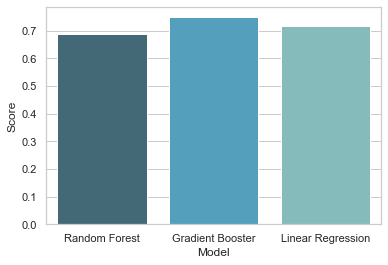

In [950]:
sns.set(style="whitegrid")

ax = sns.barplot("Model", y="Score", data=vis_df,
                 palette="GnBu_d")

In [951]:
importances = pd.DataFrame({'Feature': df_train_set.columns, 
                                'Importance': gbr.feature_importances_})

In [952]:
importances_ratings = importances[4:18]
importances_ratings_sorted = importances_ratings.sort_values(by=['Importance'], axis='index', ascending=False)
importances_ratings_sorted

,Feature,Importance
17,Inspiring,0.369939
11,Fascinating,0.176017
15,OK,0.098279
10,Informative,0.078969
13,Persuasive,0.069316
4,Funny,0.047603
14,Jaw-dropping,0.012748
7,Courageous,0.011294
16,Obnoxious,0.010477
5,Beautiful,0.006931


In [953]:
importances.loc[4:17,'Feature'] = "ratings"
importances.loc[20: ,'Feature'] = "tags"

averaged = importances.groupby("Feature").mean()
averaged.sort_values(by=['Importance'], axis='index', ascending=False, inplace=True)
averaged

,Importance
Feature,
ratings,0.063870
comments,0.017924
published_date,0.017141
languages,0.010425
tags,0.000266
subjectivity,0.000198
duration,0.000000
polarity,0.000000
